<a href="https://colab.research.google.com/github/meritcthomas/TESI-Management/blob/master/02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore the data**


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
#There will be 784 features in each image

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

**Preprocess the data**


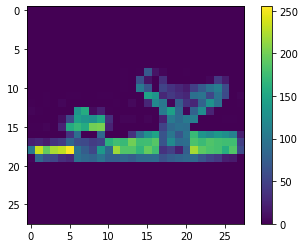

In [ ]:
plt.figure()
plt.imshow(train_images[-1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

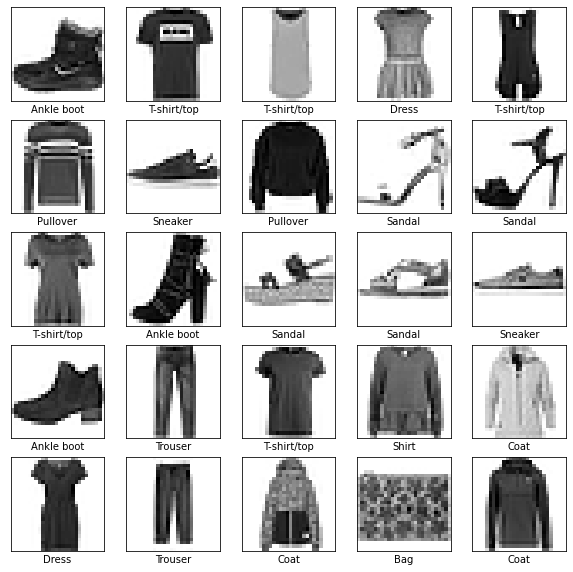

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [ ]:
#Add one more hidden layer with 256 neurons in front of the current hidden layer. Calculate the number of params in each layer.Compare the accuracy

#number of params
#hidden layer 1
h1=(784+1)*256

#hidden layer2
h2= (256+1)*128

#output layer
o = (128+1)*10

#Total Params

total = h1+h2+o
print(total)

235146


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5950 - accuracy: 0.7903
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3225 - accuracy: 0.8805
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8936
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9001
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9046
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2420 - accuracy: 0.9098
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2328 - accuracy: 0.9117
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.221

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3459 - accuracy: 0.8791

Test accuracy: 0.8791000247001648


In [ ]:
#test accuracy with one hidden layer = 88.13%

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
softmax_predictions = probability_model.predict(test_images)
dense_predictions = model.predict(test_images)

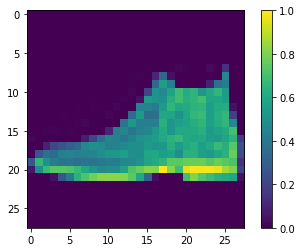

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
softmax_predictions[0]

array([2.2067567e-07, 3.2999054e-08, 3.1863812e-09, 1.0075359e-08,
       1.5261912e-07, 2.3342688e-04, 2.5538122e-06, 2.9458279e-02,
       2.2800759e-06, 9.7030300e-01], dtype=float32)

In [ ]:
dense_predictions[0]

array([-10.227728 , -12.127944 , -14.465536 , -13.314329 , -10.596477 ,
        -3.2637975,  -7.7790794,   1.5740635,  -7.8924584,   5.068697 ],
      dtype=float32)

In [ ]:
np.argmax(softmax_predictions[0])

9

In [ ]:
np.argmax(dense_predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
class_names[0]

'T-shirt/top'

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

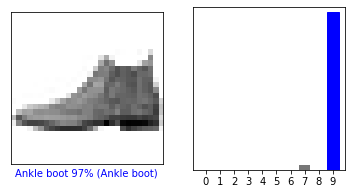

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

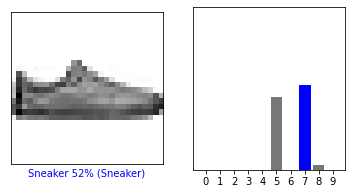

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

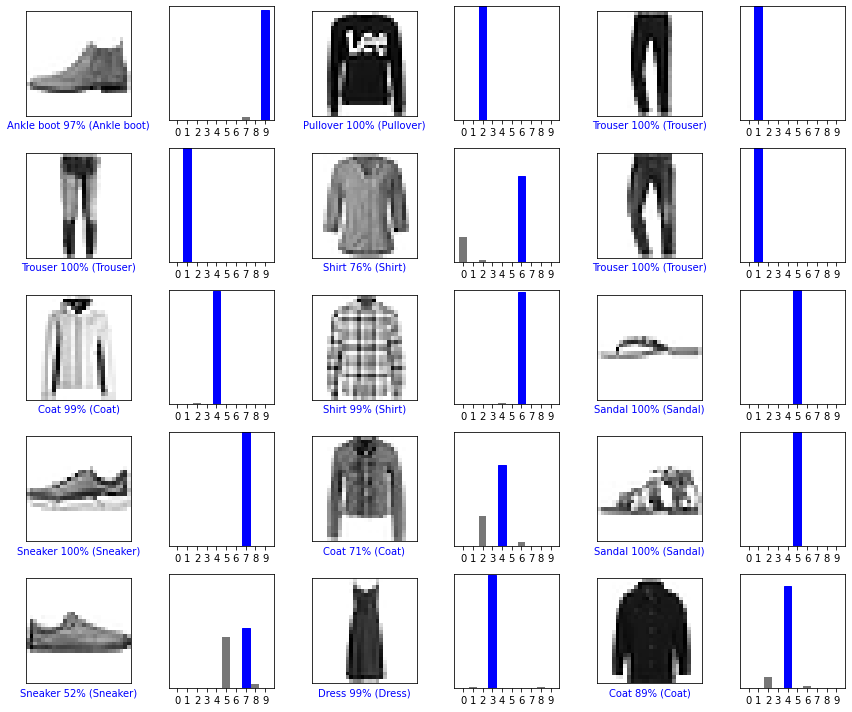

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[4]

print(img.shape)

(28, 28)


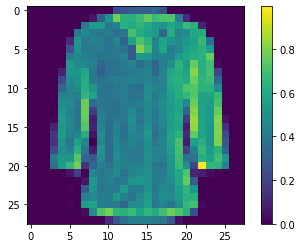

In [ ]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1831837e-01 2.9633322e-06 1.9530889e-02 2.2145135e-04 1.4441212e-03
  7.8996760e-07 7.6047069e-01 8.3741316e-09 7.7139021e-06 2.9551984e-06]]


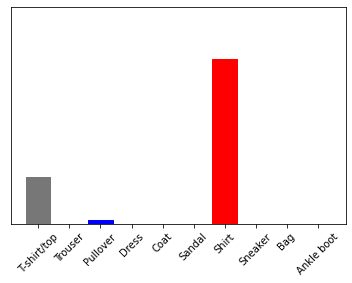

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
#END